In [1]:
# Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load raw dataset and initial look at features
df = pd.read_csv("data/raw_medical_appointment_data.csv")
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PatientId                110527 non-null  float64
 1   AppointmentID            110527 non-null  int64  
 2   Gender                   110527 non-null  object 
 3   ScheduledDay             110527 non-null  object 
 4   AppointmentDay           110527 non-null  object 
 5   Age                      110527 non-null  int64  
 6   Neighbourhood            110527 non-null  object 
 7   Scholarship              110527 non-null  int64  
 8   Hipertension             110527 non-null  int64  
 9   Diabetes                 110527 non-null  int64  
 10  Alcoholism               110527 non-null  int64  
 11  Handcap                  110527 non-null  int64  
 12  SMS_received             110527 non-null  int64  
 13  No-show                  110527 non-null  object 
 14  appo

In [3]:
# Handle all notebook warnings
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
pd.set_option('future.no_silent_downcasting', True)

In [4]:
# Check for duplicate rows/appointments
df.duplicated().sum()

0

In [5]:
# View sample of dataset observations
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,appointment_day_of_week,appointment_month,day_difference,previous_no_shows
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4,-1,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4,-1,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4,-1,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4,-1,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4,-1,-1


In [6]:
# Rename columns with snake case
df.rename(columns = {'PatientId':'patient_id', 'AppointmentID':'appointment_id', 'Gender':'gender', 'ScheduledDay':'scheduled_day', 
                     'AppointmentDay':'appointment_day', 'Age':'age', 'Neighbourhood':'neighborhood', 'Scholarship':'scholarship', 
                     'Hipertension':'hypertension', 'Diabetes':'diabetes', 'Alcoholism':'alcoholism', 'Handcap':'handicap', 
                     'SMS_received':'sms_received', 'No-show':'no_show'}, inplace = True)

In [7]:
# Convert patient id into integer type
df['patient_id'] = df['patient_id'].astype('int64')

In [8]:
# Set (unique) appointment id to become dataset index
df.set_index('appointment_id', drop = True, inplace = True)

In [9]:
# Explore gender distribution
df['gender'] = df['gender'].replace({'M': 'male', 'F': 'female'})
print(df['gender'].value_counts())

gender
female    71840
male      38687
Name: count, dtype: int64


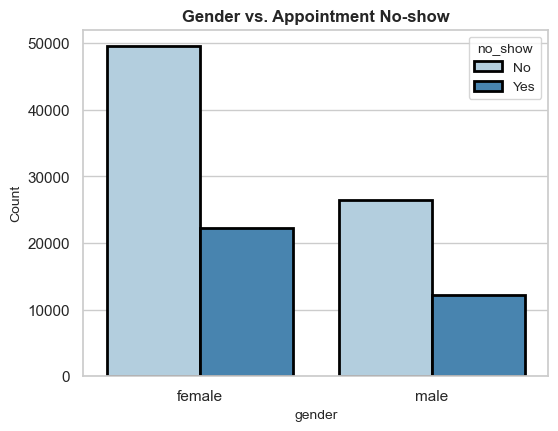

In [10]:
# Visualize relationship between gender and appointment no-show
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))

sns.countplot(data = df, x = 'gender', hue = 'no_show', palette = 'Blues', linewidth = 2, edgecolor = 'black')
plt.title('Gender vs. Appointment No-show', fontsize = 12, weight = 'bold')
plt.xlabel('gender', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.legend(title = 'no_show', loc = 'upper right', fontsize = 10, title_fontsize = '10')

plt.show()

In [11]:
# Convert schedule and appointment days to datetime types
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'])
df['appointment_day'] = pd.to_datetime(df['appointment_day'])

In [12]:
# Extract day of the week of the appointment as a new feature, explore distribution
df['appointment_day_of_week'] = df['appointment_day'].dt.weekday.astype('int64')
df['appointment_day_of_week'].value_counts().rename({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}).reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).dropna().astype('int64')

appointment_day_of_week
Monday       22715
Tuesday      25640
Wednesday    25867
Thursday     17247
Friday       19019
Saturday        39
Name: count, dtype: int64

In [13]:
# Drop all Saturday appointments due to low frequency
df = df[(df['appointment_day_of_week'] != 5)]

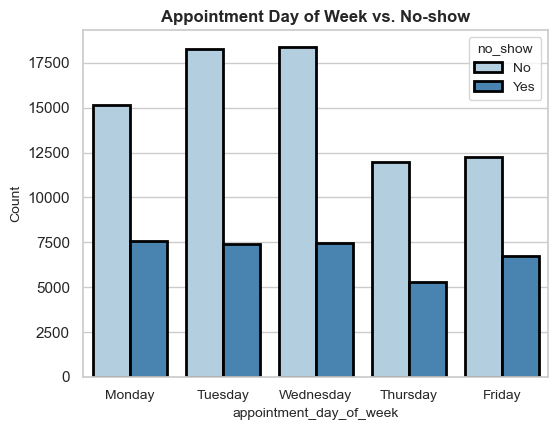

In [14]:
# Visualize relationship between appointment day of week and appointment no-show
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))

sns.countplot(data = df, x = 'appointment_day_of_week', hue = 'no_show', palette = 'Blues', linewidth = 2, edgecolor = 'black')
plt.xticks(ticks = [0, 1, 2, 3, 4, ], labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], fontsize = 10)
plt.title('Appointment Day of Week vs. No-show', fontsize = 12, weight = 'bold')
plt.xlabel('appointment_day_of_week', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.legend(title = 'no_show', loc='upper right', fontsize = 10, title_fontsize = '10')

plt.show()

In [15]:
# Extract month of the appointment as new feature, explore distribution
df['appointment_month'] = df['appointment_day'].dt.month.astype('int64')
df['appointment_month'].value_counts().rename({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}).reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).dropna().astype('int64')

appointment_month
April     3235
May      80802
June     26451
Name: count, dtype: int64

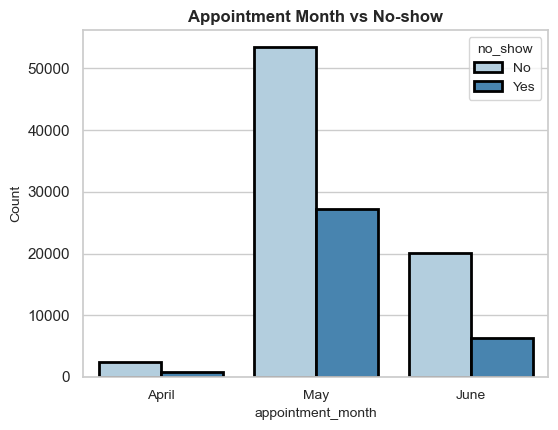

In [16]:
# Visualize relationship between appointment month and appointment no-show
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))

sns.countplot(data = df, x = 'appointment_month', hue = 'no_show', palette = 'Blues', linewidth = 2, edgecolor = 'black')
plt.xticks(ticks = [0, 1, 2], labels = ['April', 'May', 'June'], fontsize = 10)
plt.title('Appointment Month vs No-show', fontsize = 12, weight = 'bold')
plt.xlabel('appointment_month', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.legend(title = 'no_show', loc = 'upper right', fontsize = 10, title_fontsize = '10')

plt.show()

In [17]:
# Calculate difference in scheduling and appointment days as new feature, explore distribution
df['scheduled_day'] = df['scheduled_day'].dt.date
df['appointment_day'] = df['appointment_day'].dt.date
df['day_difference'] = (df['appointment_day'] - df['scheduled_day']).apply(lambda x : x.days).astype('int64')
df['day_difference'].describe()

count    110488.000000
mean         10.185803
std          15.257086
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: day_difference, dtype: float64

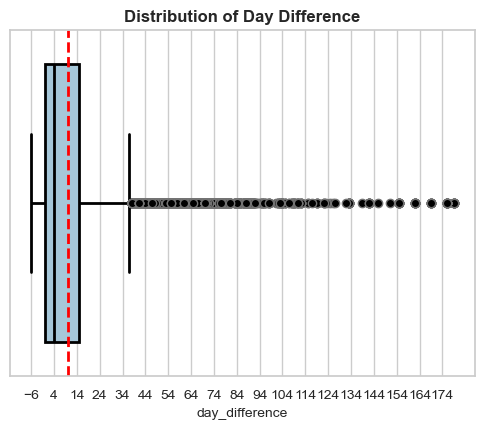

In [18]:
# Visualize distribution of days between scheduled and appointment days
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))

sns.boxplot(
    x = df['day_difference'], 
    color = "#9ECAE1", 
    linewidth = 2, 
    boxprops = dict(edgecolor = "black"), 
    whiskerprops = dict(color = "black"),  
    capprops = dict(color = "black"),       
    medianprops = dict(color = "black"),   
    flierprops = dict(markerfacecolor = 'black', marker = 'o')
)
plt.title('Distribution of Day Difference', fontsize = 12, weight = 'bold')
plt.xlabel('day_difference', fontsize = 10)
tick_range = np.arange(df['day_difference'].min(), df['day_difference'].max() + 1, 10)
plt.xticks(tick_range, fontsize = 10)
plt.axvline(df['day_difference'].mean(), color = 'red', linestyle = '--', linewidth = 2)
plt.yticks([])

plt.show()

In [19]:
# Inspect appointments with negative day_difference (appointment was scheduled for a day that already passed)
df[df['day_difference'] < 0]

,patient_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_day_of_week,appointment_month,day_difference,previous_no_shows
appointment_id,,,,,,,,,,,,,,,,,
5679978,7839272661752,male,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,0,5,-1,0
5715660,7896293967868,female,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,1,5,-1,1
5664962,24252258389979,female,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2,5,-1,1
5686628,998231581612122,female,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,3,5,-6,1
5655637,3787481966821,male,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,1,5,-1,0


In [20]:
# Drop such appointments; data entry error/impossible to occur
df = df[df['day_difference'] >= 0]

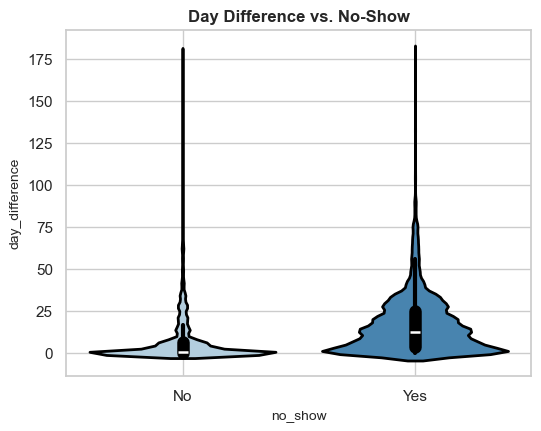

In [21]:
# Visualize relationship between day difference and appointment no-show
plt.figure(figsize = (6, 4.5))

sns.violinplot(x = 'no_show', y = 'day_difference', data = df, palette = 'Blues', linewidth = 2, edgecolor = 'Black')
plt.title('Day Difference vs. No-Show', fontsize = 12, weight = 'bold')
plt.xlabel('no_show', fontsize = 10)
plt.ylabel('day_difference', fontsize = 10)
plt.xticks(ticks = [0, 1])

plt.grid(True)
plt.show()

In [22]:
# Explore age distribution
df['age'].describe()

count    110483.000000
mean         37.083216
std          23.109982
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

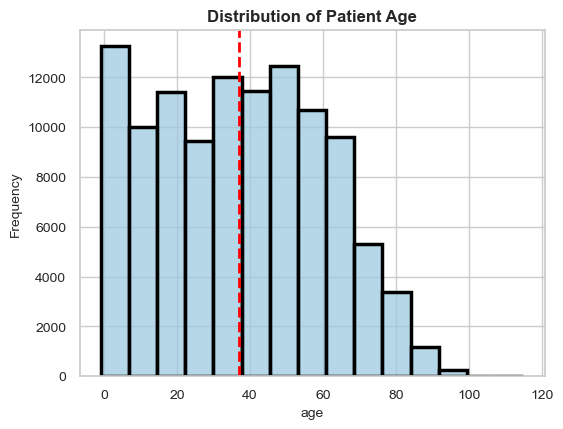

In [23]:
# Visualize distribution of patient age
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))
sns.histplot(df['age'], bins = 15, color = '#9ECAE1', edgecolor = 'black', linewidth = 2.5)

plt.title('Distribution of Patient Age', fontsize = 12, weight = 'bold')
plt.xlabel('age', fontsize = 10)
plt.ylabel('Frequency', fontsize = 10)
plt.axvline(df['age'].mean(), color = 'red', linestyle = '--', linewidth = 2)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

In [24]:
# Inspect patients with negative age
df[df['age'] < 0]

,patient_id,gender,scheduled_day,appointment_day,age,neighborhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,appointment_day_of_week,appointment_month,day_difference,previous_no_shows
appointment_id,,,,,,,,,,,,,,,,,
5775010,465943158731293,female,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,0,6,0,-1


In [25]:
# Drop singular patient as invalid entry
df = df[df['age'] >= 0]

In [26]:
# Format neighborhood names with proper case; view full list of neighborhoods
df['neighborhood'] = df['neighborhood'].str.title()
df['neighborhood'].unique()

array(['Jardim Da Penha', 'Mata Da Praia', 'Pontal De Camburi',
       'República', 'Goiabeiras', 'Andorinhas', 'Conquista',
       'Nova Palestina', 'Da Penha', 'Tabuazeiro', 'Bento Ferreira',
       'São Pedro', 'Santa Martha', 'São Cristóvão', 'Maruípe',
       'Grande Vitória', 'São Benedito', 'Ilha Das Caieiras',
       'Santo André', 'Solon Borges', 'Bonfim', 'Jardim Camburi',
       'Maria Ortiz', 'Jabour', 'Antônio Honório', 'Resistência',
       'Ilha De Santa Maria', 'Jucutuquara', 'Monte Belo',
       'Mário Cypreste', 'Santo Antônio', 'Bela Vista', 'Praia Do Suá',
       'Santa Helena', 'Itararé', 'Inhanguetá', 'Universitário',
       'São José', 'Redenção', 'Santa Clara', 'Centro', 'Parque Moscoso',
       'Do Moscoso', 'Santos Dumont', 'Caratoíra', 'Ariovaldo Favalessa',
       'Ilha Do Frade', 'Gurigica', 'Joana D´Arc', 'Consolação',
       'Praia Do Canto', 'Boa Vista', 'Morada De Camburi', 'Santa Luíza',
       'Santa Lúcia', 'Barro Vermelho', 'Estrelinha', 'Forte São 

In [27]:
# Explore the most popular and least popular neighborhoods
print("Top 5 Neighborhoods by Appointment Count")
top_neighborhoods = df['neighborhood'].value_counts().head()
for neighborhood, count in top_neighborhoods.items():
    print(f"{neighborhood}: {count}")
    
print("\nBottom 5 Neighborhoods by Appointment Count")
bottom_neighborhoods = df['neighborhood'].value_counts().tail()
for neighborhood, count in bottom_neighborhoods.items():
    print(f"{neighborhood}: {count}")

Top 5 Neighborhoods by Appointment Count
Jardim Camburi: 7717
Maria Ortiz: 5805
Resistência: 4430
Jardim Da Penha: 3877
Itararé: 3514

Bottom 5 Neighborhoods by Appointment Count
Ilha Do Boi: 35
Ilha Do Frade: 10
Aeroporto: 8
Ilhas Oceânicas De Trindade: 2
Parque Industrial: 1


In [28]:
# Explore scholarship (government subsidy) distribution
df['scholarship'].value_counts().rename({0 : 'No', 1 : 'Yes'}).reindex(['Yes', 'No']).astype('int64')

scholarship
Yes    10858
No     99624
Name: count, dtype: int64

In [29]:
# Analyze relationship between scholarship and appointment no-show
(df.groupby('scholarship')['no_show'].value_counts(normalize = True).unstack() * 100).round(1).astype(str) + '%'

no_show,No,Yes
scholarship,,
0,70.5%,29.5%
1,52.8%,47.2%


In [30]:
# Explore hypertension distribution
df['hypertension'].value_counts().rename({0 : 'No', 1 : 'Yes'}).reindex(['Yes', 'No']).astype('int64')

hypertension
Yes    21782
No     88700
Name: count, dtype: int64

In [31]:
# Analyze relationship between hypertension and appointment no-show
(df.groupby('hypertension')['no_show'].value_counts(normalize = True).unstack() * 100).round(1).astype(str) + '%'

no_show,No,Yes
hypertension,,
0,67.6%,32.4%
1,73.5%,26.5%


In [32]:
# Explore diabetes distribution
df['diabetes'].value_counts().rename({0 : 'No', 1 : 'Yes'}).reindex(['Yes', 'No']).astype('int64')

diabetes
Yes      7936
No     102546
Name: count, dtype: int64

In [33]:
# Analyze relationship between diabetes and appointment no-show
(df.groupby('diabetes')['no_show'].value_counts(normalize = True).unstack() * 100).round(1).astype(str) + '%'

no_show,No,Yes
diabetes,,
0,68.4%,31.6%
1,74.2%,25.8%


In [34]:
# Explore alcoholism distribution
df['alcoholism'].value_counts().rename({0 : 'No', 1 : 'Yes'}).reindex(['Yes', 'No']).astype('int64')

alcoholism
Yes      3358
No     107124
Name: count, dtype: int64

In [35]:
# Analyze relationship between alcoholism and appointment no-show
(df.groupby('alcoholism')['no_show'].value_counts(normalize = True).unstack() * 100).round(1).astype(str) + '%'

no_show,No,Yes
alcoholism,,
0,68.7%,31.3%
1,72.0%,28.0%


In [36]:
# Explore handicap distribution
df['handicap'].value_counts()

handicap
0    108244
1      2039
2       183
3        13
4         3
Name: count, dtype: int64

In [37]:
# Analyze relationship between number of handicaps and appointment no-show
(df.groupby('handicap')['no_show'].value_counts(normalize = True).unstack() * 100).round(1).astype(str) + '%'

no_show,No,Yes
handicap,,
0,68.8%,31.2%
1,71.4%,28.6%
2,66.7%,33.3%
3,76.9%,23.1%
4,66.7%,33.3%


In [38]:
# Explore sms notification reception distribution
df['sms_received'].value_counts().rename({0 : 'No', 1 : 'Yes'}).reindex(['Yes', 'No']).astype('int64')

sms_received
Yes    35469
No     75013
Name: count, dtype: int64

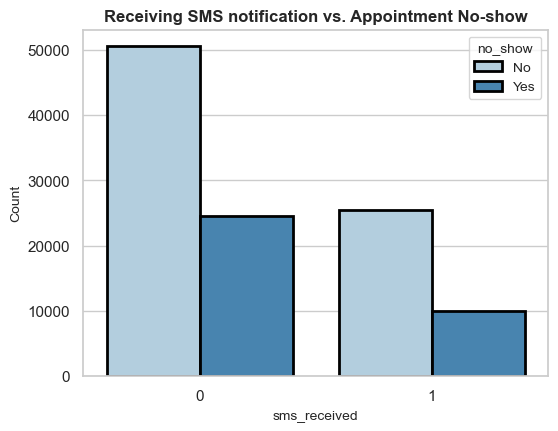

In [39]:
# Visualize relationship between sms notification reception and appointment no-show
sns.set(style = "whitegrid")
plt.figure(figsize = (6, 4.5))

sns.countplot(data = df, x = 'sms_received', hue = 'no_show', palette = 'Blues', linewidth = 2, edgecolor = 'black')
plt.title('Receiving SMS notification vs. Appointment No-show', fontsize = 12, weight = 'bold')
plt.xlabel('sms_received', fontsize = 10)
plt.ylabel('Count', fontsize = 10)
plt.legend(title = 'no_show', loc = 'upper right', fontsize = 10, title_fontsize = '10')

plt.show()

In [40]:
# Explore no_show (target variable) distribution, convert to integer type
print(df['no_show'].value_counts().reindex(['Yes', 'No']))
df['no_show'] = df['no_show'].replace({'Yes': 1, 'No': 0}).astype('int64')

no_show
Yes    34467
No     76015
Name: count, dtype: int64


In [41]:
# Calculate how many previous appointments were missed as new feature, explore distribution
df = df.sort_values(by = ['patient_id', 'appointment_day'])
df['previous_no_shows'] = df.groupby('patient_id')['no_show'].transform(lambda x: x.shift(1).fillna(0).cumsum())
df['previous_no_shows'] = df['previous_no_shows'].fillna(0).astype('int64')
df['previous_no_shows'].value_counts()

previous_no_shows
0     89173
1     14328
2      3463
3      1333
4       715
5       380
6       267
7       184
8       138
9        85
10       73
11       49
12       48
13       38
14       35
15       23
16       21
17       21
18       12
19       10
20        9
21        7
22        7
23        4
26        3
28        3
27        3
25        3
24        3
35        3
37        2
50        2
41        2
40        2
39        2
38        2
29        2
36        2
30        2
33        2
32        2
31        2
34        2
56        1
55        1
54        1
53        1
52        1
51        1
47        1
49        1
48        1
46        1
45        1
44        1
43        1
42        1
57        1
Name: count, dtype: int64

In [42]:
# View all features of cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110482 entries, 5751990 to 5660958
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   patient_id               110482 non-null  int64 
 1   gender                   110482 non-null  object
 2   scheduled_day            110482 non-null  object
 3   appointment_day          110482 non-null  object
 4   age                      110482 non-null  int64 
 5   neighborhood             110482 non-null  object
 6   scholarship              110482 non-null  int64 
 7   hypertension             110482 non-null  int64 
 8   diabetes                 110482 non-null  int64 
 9   alcoholism               110482 non-null  int64 
 10  handicap                 110482 non-null  int64 
 11  sms_received             110482 non-null  int64 
 12  no_show                  110482 non-null  int64 
 13  appointment_day_of_week  110482 non-null  int64 
 14  appointment_month 

In [43]:
# Drop columns no longer needed and reorder remaining features for clarity
df = df.drop(columns = ['patient_id', 'scheduled_day', 'appointment_day'])
df = df[['gender', 'age', 'neighborhood', 'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',  'appointment_month', 'appointment_day_of_week', 'previous_no_shows', 'day_difference', 'sms_received', 'no_show']]

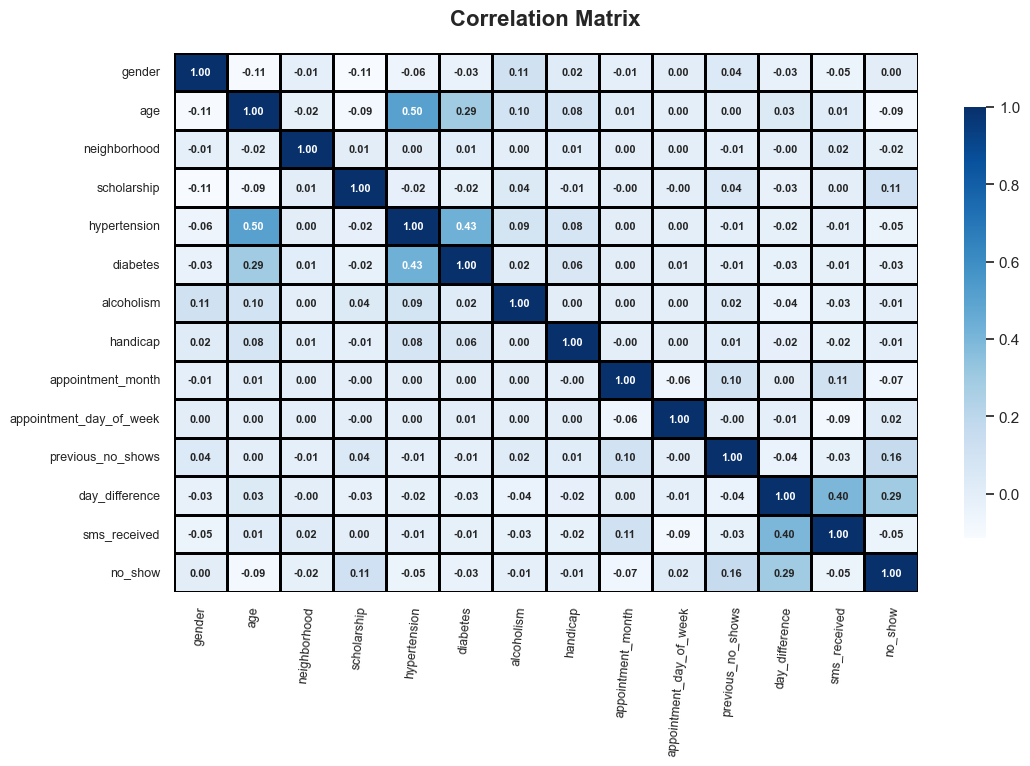

In [44]:
# Summative look at relationships between features via correlation matrix
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_for_correlation_matrix = df.copy()
df_for_correlation_matrix['gender'] = label_encoder.fit_transform(df_for_correlation_matrix['gender'])
df_for_correlation_matrix['neighborhood'] = label_encoder.fit_transform(df_for_correlation_matrix['neighborhood'])

correlation_matrix = df_for_correlation_matrix.corr()
sns.set(style = "whitegrid")
plt.figure(figsize = (12, 7))

heatmap = sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = 'Blues', square = False,  # Changed square to False
                       cbar_kws = {"shrink": .8}, linewidths = 1.0, linecolor = 'black', 
                       annot_kws = {"size": 8, "weight": "bold"}, cbar = True)

plt.title('Correlation Matrix', fontsize = 16, weight = 'bold', pad = 20)
plt.xticks(fontsize = 9, rotation = 85)
plt.yticks(fontsize = 9)

plt.show()

In [45]:
# Save cleaned dataframe to csv file
df.to_csv("data/cleaned_medical_appointment_data.csv", index = False)